## Notebook for ML Models: Notes and Practical Exercises

1. What is a Mathematical model
2. Develop a model based on data points
3. Run code to find the best parameters
4. Solve a modelling problem analytically. 

1. Mathematical Models
   https://en.wikipedia.org/wiki/Mathematical_model
   At its most basic a mathematical model is simply a way of representing the real world using maths and maths equations. Everyting from forecasting the weather, the stock market, the movement of the stars and somewhat more recently machine learning models, to name a few, rely on the use of maths to turn these into numerical models that allow for a complete description of how they behave and how they are likely to behave. 

   For example take a very simple equatation 

    - y = 3x+2

   What this equatation describes is the relationship between some independant variable x, and a dependant variable y. We say y is a dependant variable as its value clearly depends on the value of x, i.e. it will always be 3 times the value of x plus 2, and when x = 0 then will be equal to 2. In general the value of y will change at a rate 3 times that of x, for every unit change in x, the value of y will change by 3 times the unit change of x.

   In general terms the equation of a straight line is:
   
   - y = mx+c. 
   
   m is the slope, the greater m the more y changes with x. c is a constant and represents the value of y when x = 0, i.e. the point on the y axis where the line crosses at x = 0 in a plot of the equatation. 

   From a purely machine learning perspective having this equatation means that for every value of x we can predict what the value of y will be, even when x is 0. This equatation, simple and limited it may be, is still a perfect predictor for the dependant value y. 

   Coming from the opposite perspective, in the real world we often have lots of data, the challenge is trying to discover what is the relationship between sets of data that can be defined numerically coming from a system, i.e. what is the formula or formulas that govern the relationship between system variables that will allow for a model of the system to be created that can describe and predict its behaviours.  
    
   This leads on to the concept of Linear Regression, i.e. the data is available, what is the equation governing the relationship. In practice real world data is not straightforward, there can be a lot of "noise" in the data, i.e. data points that fall outside a pure linear equataton like the one above. The challenge for linear regression is to find the mathematical relationship that most closely matches the available data. 

   Below are some plot examples to demonstrate a linear equatation. 

In [2]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
# https://numpy.org/
# Will use numpy for generating maths functions and matplotlib for plotting same. 
import numpy as np
import matplotlib.pyplot as plt

# Set standard output plot size. 
plt.rcParams['figure.figsize'] = (8,6)

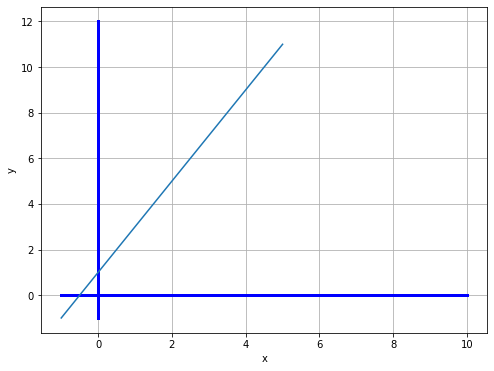

In [37]:
# This plot shows the equatation y = 2x+c in the x range -1 to 5. 
# Set the range of x values
x_val = [x for x in range(-1, 6)]

# Draw x and y axes and set the linewidth. 
plt.plot([-1, 10], [0, 0], 'b', lw=3)
plt.plot([0, 0], [-1, 12], 'b', lw=3)

# Set the values of m and b
m = 2
c = 1

# Calculate the corresponding y values
y = [m*x + c for x in x_val]

# Plot the points (x, y)
plt.plot(x_val, y)

# Add labels to the axes
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
# Show the plot
plt.show()

Unlike the plot above the code and plot below is intended to demonstrate a more realistice picture of real world data. 

In [8]:
# use the numpy arange function to get a series of values that will be used for x, in this case from 0 to 20 (always one leas than the upper number specified.)
x = np.arange(0,21,1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [10]:
y1 = np.random.normal(0,5,x.size)
y1

array([  2.532292  ,   6.00798361,  -1.80324019,  -3.58610909,
        -6.20530693,  -3.87840467, -11.57574986,   1.71913659,
         3.4466034 ,  -2.34103654,   4.69463671,  -7.46435582,
         7.90663777,   1.40784169,   8.58208813,  -5.48594168,
        -1.57630033,  -1.45644865,   2.22835115,  -2.70418168,
         1.25652094])

In [11]:
y2 = 5*x+10
y2

array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110])

In [12]:
y = y1+y2


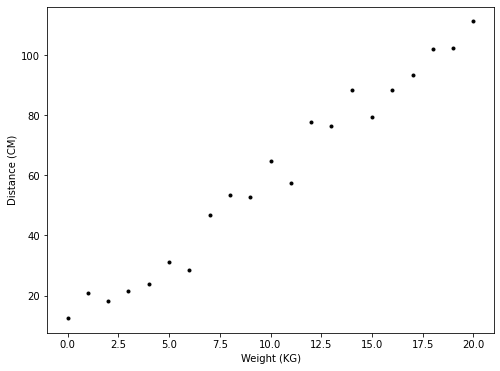

In [13]:
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.plot(x,y,'k.')

[Central Limit Theorem](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed)

"The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed. This means that we can use the normal probability model to quantify uncertainty when making inferences about a population mean based on the sample mean."

### Fitting the Line

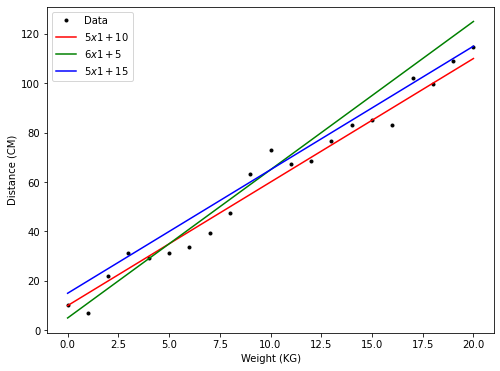

In [77]:
# Plot w versus d with black dots.
plt.plot(x, y, 'k.', label="Data")

# Overlay some lines on the plot.
x1 = np.arange(0.0, 21.0, 1.0)

plt.plot(x1, 5.0 * x + 10.0, 'r-', label=r"$5x1 + 10$")
plt.plot(x1, 6.0 * x +  5.0, 'g-', label=r"$6x1 +  5$")
plt.plot(x1, 5.0 * x + 15.0, 'b-', label=r"$5x1 + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

Take the absolute value of the differences between each point and the lines. The objective is to find the line that has the minimum sum of all the square of the values of the points distances. (use square to take care of the negative values).

This is known as the Cost Function.

$$\sum_{i}(y_i - mx_i -c)^2$$

In [78]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c)**2 for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   546.77
Cost with m =  6.00 and c =  5.00:  1233.01
Cost with m =  5.00 and c = 15.00:  1017.02


### Optimisation

Scipy optimize function - minimising the cost function.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

https://scipy-lectures.org/intro/scipy.html
Optimization is the problem of finding a numerical solution to a minimisation problem. 

What do you need. 
1. Function. The function to be minimised. 
2. Data.
3. Calculation Method

In [202]:
# Get the Optimize module. 
from scipy import optimize as so

In [203]:
x = np.arange(0,21,1)

randpart = np.random.normal(0,5,x.size)

y = 5*x+10+randpart
x,y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([  6.61703873,  19.2022789 ,  14.39075515,  29.20237022,
         37.02120796,  33.70356556,  42.65264902,  50.8445425 ,
         58.60685158,  41.7031438 ,  57.85705018,  55.36116417,
         67.13051012,  68.48757245,  80.72913847,  82.13673745,
         90.99298978, 102.02076639, 108.45494046, 107.113618  ,
        113.92421205]))

In [204]:
# Basic Cost function
def cost (MC):
    m,c = MC
    cost = np.sum((y - m*x - c)**2)
    return cost

In [205]:
cost((5,10))

719.7897434578858

In [206]:
result=so.minimize(cost, (2,2))
result

      fun: 708.6310213603465
 hess_inv: array([[ 0.00064935, -0.0064935 ],
       [-0.0064935 ,  0.08874454]])
      jac: array([-7.62939453e-06, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([5.10188695, 9.36937346])

In [207]:
## Playing around with optimise from https://realpython.com/python-scipy-cluster-optimize/

In [208]:
# Using the example to try out. 
x = np.linspace(0, 1)

# function is y = 3x^4 - 2x + 1
y = 3*np.power(x,4) -2*x +1
y

array([1.        , 0.95918419, 0.91837567, 0.87759317, 0.83686792,
       0.79624362, 0.75577648, 0.71553519, 0.67560094, 0.6360674 ,
       0.59704073, 0.55863958, 0.52099509, 0.48425089, 0.4485631 ,
       0.41410033, 0.38104368, 0.34958674, 0.31993559, 0.29230879,
       0.2669374 , 0.24406497, 0.22394754, 0.20685363, 0.19306425,
       0.18287292, 0.17658563, 0.17452086, 0.17700958, 0.18439526,
       0.19703386, 0.21529381, 0.23955606, 0.27021401, 0.30767359,
       0.35235319, 0.4046837 , 0.46510851, 0.53408348, 0.61207698,
       0.69956986, 0.79705544, 0.90503957, 1.02404055, 1.1545892 ,
       1.29722882, 1.45251519, 1.62101658, 1.80331377, 2.        ])

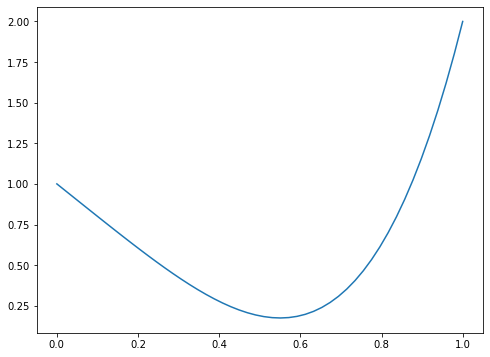

In [209]:
# Simple plot of the function. 
plt.plot(x,y)

In [210]:
# defining the function to be used in the minimize calculation.
def f(x):
    y = y = 3*np.power(x,4) -2*x +1
    return y

In [211]:
# Using minimise
result = so.minimize(f,3)
result

      fun: 0.1745181877770634
 hess_inv: array([[0.09130335]])
      jac: array([4.04566526e-06])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([0.55032157])

In [212]:
# Using minimize_scalar. This may be more appropriate where the function only has one variable. 
result = so.minimize_scalar(f)
result

     fun: 0.17451818777634331
    nfev: 16
     nit: 12
 success: True
       x: 0.5503212087491959

Values of x (0.550321) and the resulting function value for y (0.174518187) at that value of x look same for both. 

In [213]:
result.x, result.fun

(0.5503212087491959, 0.17451818777634331)